In [1]:
!pip install matplotlib --upgrade
!pip install quandl --upgrade
!pip install yahoo-finance --upgrade

#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    new_name_list = []
    for name in name_list:
        try:
            share_list.append(Share(name))
            new_name_list.append(name)
        except:
            pass
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    ret_name_list = []
    for idx, share in enumerate(share_list):
        name = new_name_list[idx]
        try:
            hist_data = share.get_historical(start_date=start_date, end_date=end_date)
            stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
            n_data = len(stock_data)
            if n_data == 0:
                fail_name_list.append(name)
            date.append(get_data_by_key(key='Date', data=hist_data))
            stock_data_list.append(stock_data)
            ret_name_list.append(name)
        except:
            pass
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date, ret_name_list

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Downloading/unpacking numpy>=1.6 from https://pypi.python.org/packages/dd/9f/cd0ec9c50e4ed8650901ad4afde164e5252b6182a9e0c7bff5f8b4441960/numpy-1.11.1.zip#md5=5caa3428b24aaa07e72c79d115140e46 (from matplotlib)
  Running setup.py (path:/tmp/pip_build_root/numpy/setup.py) egg_info for package numpy
    Running from numpy source directory.
    
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Downloading/unpacking pytz from https://pypi.python.org/packages/ba/c7/3d54cad4fb6cf7bf375d39771e67680ec779a541c68459210fcfdc3ba952/pytz-2016.6.1-py2.py3-none-any.whl#md5=735126cd1c1ddc824b7c94e091d7173e (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
  Found existing installa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
input_list = ['MMM', 'T', 'ABBV', 'ABT', 'ACN', 'AGN', 'ALL', 'GOOGL', 
              'GOOG', 'MO', 'AMZN', 'AXP', 'AIG', 'AMGN', 'AAPL', 'BAC', 'BIIB', 
              'BLK', 'BA', 'BMY', 'CVS', 'COF', 'CAT', 'CELG', 'CVX', 'CSCO', 'C', 
              'KO', 'CL', 'CMCSA', 'COP', 'COST', 'DHR', 'DOW', 'DUK', 'DD', 'EMC', 
              'EMR', 'EXC', 'XOM', 'FB', 'FDX', 'F', 'GD', 'GE', 'GM', 'GILD', 'GS', 'HAL', 
              'HD', 'HON', 'INTC', 'IBM', 'JPM', 'JNJ', 'KMI', 'LLY', 'LMT', 'LOW', 'MA', 
              'MCD', 'MDT', 'MRK', 'MET', 'MSFT', 'MDLZ', 'MON', 'MS', 'NKE', 'OXY', 
              'ORCL', 'PEP', 'PFE', 'PM', 'PG', 'QCOM', 'RTN', 'SLB', 'SPG', 'SO', 'SBUX', 
              'TGT', 'TXN', 'BK', 'PCLN', 'TWX', 'FOXA', 'FOX', 'USB', 'UNP', 'UPS', 'UTX', 
              'UNH', 'VZ', 'V', 'WMT', 'WBA', 'DIS', 'WFC']

In [3]:
import time
print ("Start!!")

st = time.time()
start_date="2015-06-01"
end_date="2016-06-01"
input_data, date, input_list = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_OEX", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Start!!
fail_name_list:  []
time for getting training_data: 168.348765135


In [4]:
target_data = np.atleast_2d(target_data).T
print (target_data.shape)
print (input_data.shape)

(254, 1)
(254, 99)


I suceeded to fetch almost all of data(99/100) used for S&P100.

In [5]:
import datetime

def convert_time_format(date):
    date_tilde = date.split("-")
    date_tilde = map(int, date_tilde)
    return datetime.datetime(*date_tilde)

In [6]:
date_data = date[0]

date_label=[]
for i in xrange(len(date_data)):
    date_label.append(convert_time_format(date_data[i]))

In [7]:
test_idx = date_label.index(datetime.datetime(2016, 4, 1, 0, 0))
print (date_label[test_idx])

2016-04-01 00:00:00


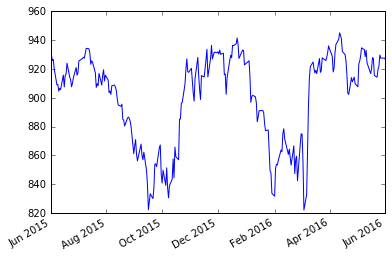

In [8]:
plt.plot(date_label, target_data)
plt.gcf().autofmt_xdate()

# Regression

start!
learning_time: 0.00199413299561


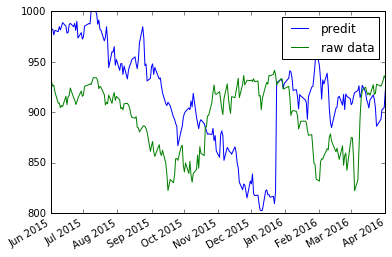

In [9]:
test_idx = date_label.index(datetime.datetime(2016, 4, 1, 0, 0))

input_train = input_data[:test_idx]
target_train = target_data[:test_idx]
input_pred = input_data[test_idx:]
target_pred = target_data[test_idx:]
date_test = date_label[test_idx:]

from sklearn.linear_model import LinearRegression

clf = LinearRegression()

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(date_test, pred, label="predit")
plt.plot(date_test, target_pred, label="raw data")
plt.gcf().autofmt_xdate()

plt.ylim(800, 1000)

plt.legend()

plt.savefig("/jupyter/tomoaki/Indicator Analysis/picture/LinearRegression_SP100_1", dpi=400)

# Multi Layer Perceptron

In [10]:
import tensorflow as tf

In [12]:
from sklearn.linear_model import LinearRegression


class MLP(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]], name="target")
        
        # normalization for input
        shape = [self.layers[0]]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
                
        self.normalized_input = self.batch_normalization(self._input, shape, gamma, beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self.normalized_input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def pre_train(self, input_data, target_data,
                            learning_rate=1e-2, n_batch=20, 
                            n_epochs=100, decay_rate=0.9, decay_freq=100):
        
        print ("starg pretraining")
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        n_layer = len(self.W_list)
        inpt = self.normalized_input
        
        # we will not use bias for pretraining
        print ("building graph...")
        trains = []
        losses = []
        for i_layer in xrange(len(self.layers) - 2):
            with tf.variable_scope("layer%d" % i_layer, reuse=True):
                W = self.W_list[i_layer]
                beta = self.beta_list[i_layer + 1]
                gamma = self.gamma_list[i_layer + 1]
                z_normalized = self.batch_normalization(
                    tf.matmul(inpt, W), 
                    shape=self.layers[i_layer + 1],
                    gamma=gamma,
                    beta=beta
                )
                u = self.activation(z_normalized)
                inpt_tilde = tf.matmul(u, tf.transpose(W))
                
                # training graph
                loss_auto = tf.reduce_mean(tf.square(inpt_tilde - inpt))
                losses.append(loss_auto)
                train_auto = self.optimizer.minimize(loss_auto)   
                trains.append(train_auto)
                    
            # next layer's input
            inpt = u
        
        # we will use this for the last layer's pretraining
        last_input = inpt
        
        print ("pretraining....")
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)  # index for shuffling
            for i_layer in xrange(n_layer - 1):
                print ("pretraining for layer%d" % i_layer)
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    np.random.shuffle(batch_index)
                    for idx in iter(batch_index):
                        beg = idx * n_batch
                        end = (idx + 1) * n_batch 
                        batch_input = input_data[beg:end]
                        batch_target = target_data[beg:end]
                        sess.run(trains[i_layer], 
                                        feed_dict={self._input: batch_input,
                                                             self._learning_rate: lr})
                    
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                    if epoch % print_freq == 0:
                        print ("loss:", losses[i_layer].eval(session=sess, 
                                                                                   feed_dict={self._input: input_data}))  
                        print ("learning rate: ", lr)
                
            # for the last layer we will use regression as a pretraining
            input_value = last_input.eval(session=sess, 
                                                                feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W_list[-1].assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b_list[-1].assign(regr.intercept_)
            sess.run(assign_op)
            print ("regression loss:", self.loss.eval(session=sess, 
                                                                                   feed_dict={self._input: input_data,
                                                                                                        self._target: target_data}))
             
            saver = tf.train.Saver()   
            save_path = saver.save(sess, "/jupyter/tomoaki/pretrain.ckpt")
            print("Model saved in file: %s" % save_path)
            
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=1000,
                         learning_rate=1e-8, pre_n_epochs=1000, pre_learning_rate=1e-8, decay_rate=0.5, decay_freq=100, is_pretrain=True):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver(tf.all_variables())

        with tf.Session() as sess:
            if is_pretrain is True:
                self.pre_train(input_data, target_data, n_batch=n_batch,
                                         learning_rate=pre_learning_rate, n_epochs=pre_n_epochs, 
                                         decay_rate=decay_rate, decay_freq=decay_freq)
                saver.restore(sess, "/jupyter/tomoaki/pretrain.ckpt")
                print("pretrained parameters restored.")
            else:
                sess.run(init_op)
                
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))  
                    print ("change learning rate", learning_rate)
            
            # we should define saver here to avoid keeping graphs of pretraining
            saver = tf.train.Saver(tf.all_variables())  
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver(tf.all_variables())
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

In [ ]:
test_idx = date_label.index(datetime.datetime(2016, 4, 1, 0, 0))
print(test_idx)

input_train = input_data[:test_idx]
target_train = target_data[:test_idx]
input_pred = input_data[test_idx:]
target_pred = target_data[test_idx:]
date_test = date_label[test_idx:]

n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=0.99,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(date_test, pred, label="predit")
plt.plot(date_test, target_pred, label="raw data")
plt.gcf().autofmt_xdate()

plt.ylim(800, 1000)

plt.legend()

plt.savefig("/jupyter/tomoaki/Indicator Analysis/picture/MLP_SP100_1", dpi=400)

42


In [ ]:
import tensorflow as tf

In [ ]:
a = tf.constant(0.0, shape=[3])
b = tf.Variable(a)
tf.